<a href="https://colab.research.google.com/github/jshubhangi633/State-wise-CPI-forecasting/blob/main/TimeseriesCPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **State wise CPI Forecasting using Time Series**


Installing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
sns.set_style("darkgrid")

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error

# **Read and understand the data**

In [ ]:

data = pd.read_csv("/content/Statewise_General_Index_Upto_Feb24 x.csv")

In [ ]:
data.head()

,Sector,Year,Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
0,Rural,2011,January,104.0,NaN,104.0,NaN,105.0,NaN,103.0,...,103.0,NaN,104.0,105.0,104.0,104.0,103.0,104.0,103.0,106.0
1,Urban,2011,January,103.0,NaN,103.0,NaN,104.0,NaN,103.0,...,103.0,NaN,104.0,105.0,103.0,104.0,103.0,104.0,102.0,105.0
2,Rural,2011,February,107.0,NaN,105.0,NaN,107.0,NaN,105.0,...,104.0,NaN,107.0,105.0,104.0,107.0,104.0,105.0,104.0,107.0
3,Urban,2011,February,106.0,NaN,106.0,NaN,106.0,NaN,105.0,...,105.0,NaN,108.0,104.0,103.0,106.0,104.0,105.0,105.0,108.0
4,Rural,2011,March,103.1,NaN,103.8,NaN,103.9,NaN,103.9,...,103.9,NaN,104.8,106.8,103.9,105.8,104.1,105.5,108.6,104.7


In [ ]:
data.tail()

,Sector,Year,Name,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
263,Urban,2022,January,170.3,NaN,167.0,167.6,162.7,159.1,162.0,...,165.0,163.9,171.1,168.1,156.2,160.1,164.4,174.4,157.7,170.7
264,Rural,2022,February,167.2,174.0,168.6,162.0,164.8,159.8,169.3,...,163.9,164.0,173.0,182.3,167.0,154.0,169.8,177.4,176.9,172.5
265,Urban,2022,February,170.9,NaN,167.1,168.0,162.5,159.4,162.2,...,165.2,164.0,173.6,166.0,157.0,160.9,164.3,176.3,154.8,172.1
266,Rural,2022,March,169.6,174.5,171.0,164.2,165.7,160.9,168.7,...,166.5,165.2,175.8,181.9,166.8,153.5,170.9,179.1,176.7,173.2
267,Urban,2022,March,173.1,NaN,168.0,169.9,163.0,160.1,162.9,...,166.5,164.6,173.4,167.4,157.7,161.7,166.0,176.9,158.4,172.2


In [ ]:
data.shape


(268, 39)

In [ ]:
data_ap = data[['Sector','Year','Name','Andhra Pradesh']]

# **Check the overall information and statistics of the data**

In [ ]:
data_ap.describe()

,Year,Andhra Pradesh
count,268.000000,262.000000
mean,2016.111940,135.543588
std,3.258318,17.581006
min,2011.000000,3.640000
25%,2013.000000,126.600000
50%,2016.000000,136.600000
75%,2019.000000,143.425000
max,2022.000000,173.100000


# **Exploratory Data Analysis**

## Missing Values

In [ ]:
data_ap.isnull().sum()

,0
Sector,0
Year,0
Name,0
Andhra Pradesh,6


In [ ]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Year,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,Gujarat,Haryana,...,Uttar Pradesh,Uttarakhand,West Bengal,Andaman and Nicobar,Chandigarh,Dadra and Nagar Haveli,Daman and Diu,Jammu and Kashmir,Lakshadweep,Puducherry
count,268.000000,262.000000,21.000000,262.000000,32.000000,262.000000,32.000000,262.000000,262.000000,262.000000,...,262.000000,32.000000,258.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,2016.111940,135.543588,160.183810,134.157137,156.963125,134.608244,151.941875,135.324046,133.183359,130.983893,...,130.665954,155.654063,135.614961,135.499542,132.090954,129.761336,136.916183,136.362519,131.627405,137.146565
std,3.258318,17.581006,37.046561,18.231076,28.748072,16.951797,27.081997,19.112065,16.064853,15.863701,...,17.234987,28.539098,18.482969,21.420002,17.089127,17.700427,19.540110,19.906149,19.446692,18.526472
min,2011.000000,3.640000,0.060000,0.790000,1.620000,1.220000,5.640000,0.250000,6.820000,3.350000,...,9.540000,0.730000,7.200000,0.070000,0.340000,0.040000,0.020000,0.720000,0.010000,0.270000
25%,2013.000000,126.600000,163.700000,124.025000,158.700000,124.800000,153.675000,123.400000,123.525000,121.525000,...,120.025000,156.900000,124.800000,120.700000,121.125000,119.150000,124.925000,123.300000,119.025000,128.675000
50%,2016.000000,136.600000,168.200000,130.850000,162.250000,136.150000,156.900000,134.450000,133.000000,130.950000,...,129.000000,161.700000,133.700000,132.850000,131.750000,128.400000,136.450000,135.050000,128.750000,136.450000
75%,2019.000000,143.425000,172.900000,144.350000,165.475000,143.400000,159.425000,148.275000,141.600000,138.375000,...,138.400000,163.825000,145.500000,148.225000,142.050000,139.375000,150.175000,149.575000,139.975000,145.050000
90%,2021.000000,160.560000,174.000000,160.020000,167.960000,155.590000,160.070000,161.480000,155.790000,151.980000,...,156.130000,165.140000,164.520000,166.630000,153.480000,153.980000,162.690000,164.590000,160.360000,163.500000
95%,2021.000000,166.085000,174.100000,166.665000,169.080000,161.285000,160.735000,166.185000,158.900000,157.750000,...,162.055000,165.535000,167.260000,170.695000,157.680000,160.890000,164.395000,171.700000,167.400000,168.780000
99%,2022.000000,170.534000,174.420000,170.434000,169.714000,165.073000,168.904000,170.317000,162.478000,162.317000,...,165.512000,166.045000,173.172000,182.924000,167.234000,171.273000,170.595000,176.839000,178.273000,173.078000


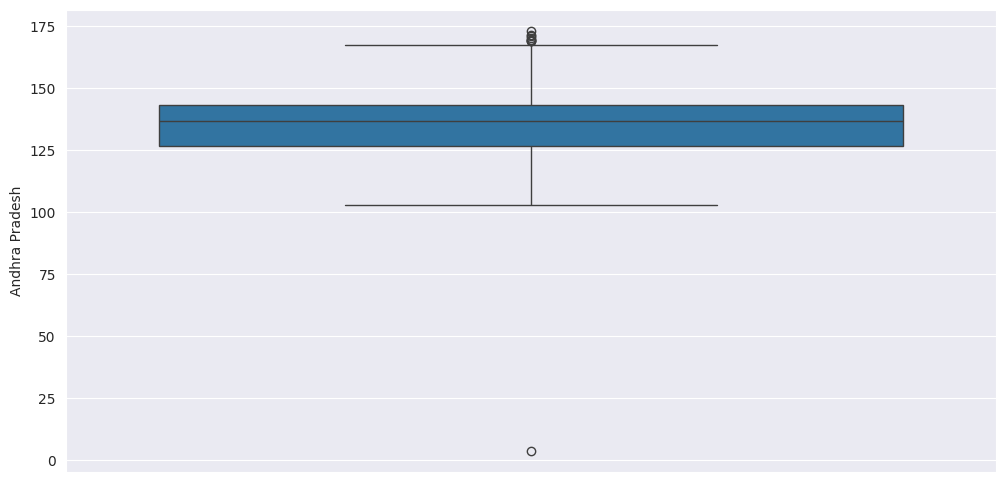

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Andhra Pradesh'])
plt.show()

### Since the right most extreme values are close to the cutoff, we only focus on the left extreme outlier


In [ ]:
data_ap[data_ap['Andhra Pradesh'] < 10]

,Sector,Year,Name,Andhra Pradesh
259,Urban,2021,November,3.64


In [ ]:
data_ap.loc[257:261]

,Sector,Year,Name,Andhra Pradesh
257,Urban,2021,October,169.40
258,Rural,2021,November,168.90
259,Urban,2021,November,3.64
260,Rural,2021,December,169.20
261,Urban,2021,December,171.60


### Averaging the extreme value


In [ ]:
data_ap.loc[259,'Andhra Pradesh'] =(data_ap.loc[257,'Andhra Pradesh'] + data_ap.loc[261,'Andhra Pradesh'])/2

In [ ]:
data_ap.loc[257:261]

,Sector,Year,Name,Andhra Pradesh
257,Urban,2021,October,169.4
258,Rural,2021,November,168.9
259,Urban,2021,November,170.5
260,Rural,2021,December,169.2
261,Urban,2021,December,171.6


In [ ]:
data_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          268 non-null    object 
 1   Year            268 non-null    int64  
 2   Name            268 non-null    object 
 3   Andhra Pradesh  262 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ KB


In [ ]:
data_ap['Andhra Pradesh'].fillna(np.nanmedian(data_ap['Andhra Pradesh']),inplace = True)

In [ ]:
np.nanmedian(data_ap['Andhra Pradesh'])

np.float64(136.7)

# **Concatenating Month and Year into Date column to date time format**

In [ ]:
Month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

data_ap['Month'] = data_ap['Name'].map(Month_map)

In [ ]:
data_ap

,Sector,Year,Name,Andhra Pradesh,Month
0,Rural,2011,January,104.0,1.0
1,Urban,2011,January,103.0,1.0
2,Rural,2011,February,107.0,2.0
3,Urban,2011,February,106.0,2.0
4,Rural,2011,March,103.1,3.0
...,...,...,...,...,...
263,Urban,2022,January,170.3,1.0
264,Rural,2022,February,167.2,2.0
265,Urban,2022,February,170.9,2.0
266,Rural,2022,March,169.6,3.0


In [ ]:
from datetime import datetime

In [ ]:
data_ap.dropna(subset=['Month'], inplace=True) # Drop rows with NaN in 'Month'
data_ap['Date'] = data_ap.apply(
    lambda row: datetime.strptime(
        f"{int(row.Year)}/{int(row.Month)}/{1}", "%Y/%m/%d"
    ), axis=1)

In [ ]:
data_ap.head()

,Sector,Year,Name,Andhra Pradesh,Month,Date
0,Rural,2011,January,104.0,1,2011-01-01
1,Urban,2011,January,103.0,1,2011-01-01
2,Rural,2011,February,107.0,2,2011-02-01
3,Urban,2011,February,106.0,2,2011-02-01
4,Rural,2011,March,103.1,3,2011-03-01


# **Group the data by Dtae to aggregate rural and urban**

In [ ]:
data1= data_ap.groupby(['Date'])['Andhra Pradesh'].median().reset_index()

In [ ]:
data1.head()

,Date,Andhra Pradesh
0,2011-01-01,103.50
1,2011-02-01,106.50
2,2011-03-01,103.35
3,2011-04-01,104.95
4,2011-05-01,105.99


#**Time Series Decomposition**

In [ ]:
data1= pd.DataFrame(data1)

In [ ]:
data1= data1.set_index(["Date"])

In [ ]:
data1.head()

,Andhra Pradesh
Date,
2011-01-01,103.50
2011-02-01,106.50
2011-03-01,103.35
2011-04-01,104.95
2011-05-01,105.99


In [ ]:
data1.index.dtype

dtype('<M8[ns]')

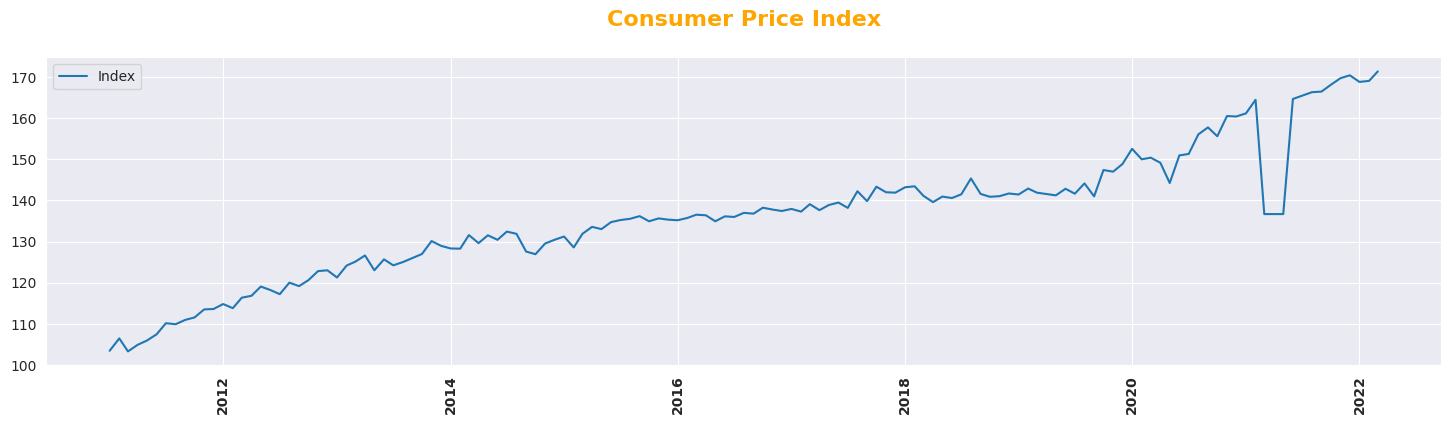

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(data1, label='Index')
plt.legend(loc='best')
plt.title(
    'Consumer Price Index\n',
    fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'orange'}
)
plt.xticks(rotation=90, fontweight="bold")
plt.show()

#**Additive Seasonal Decomposition**

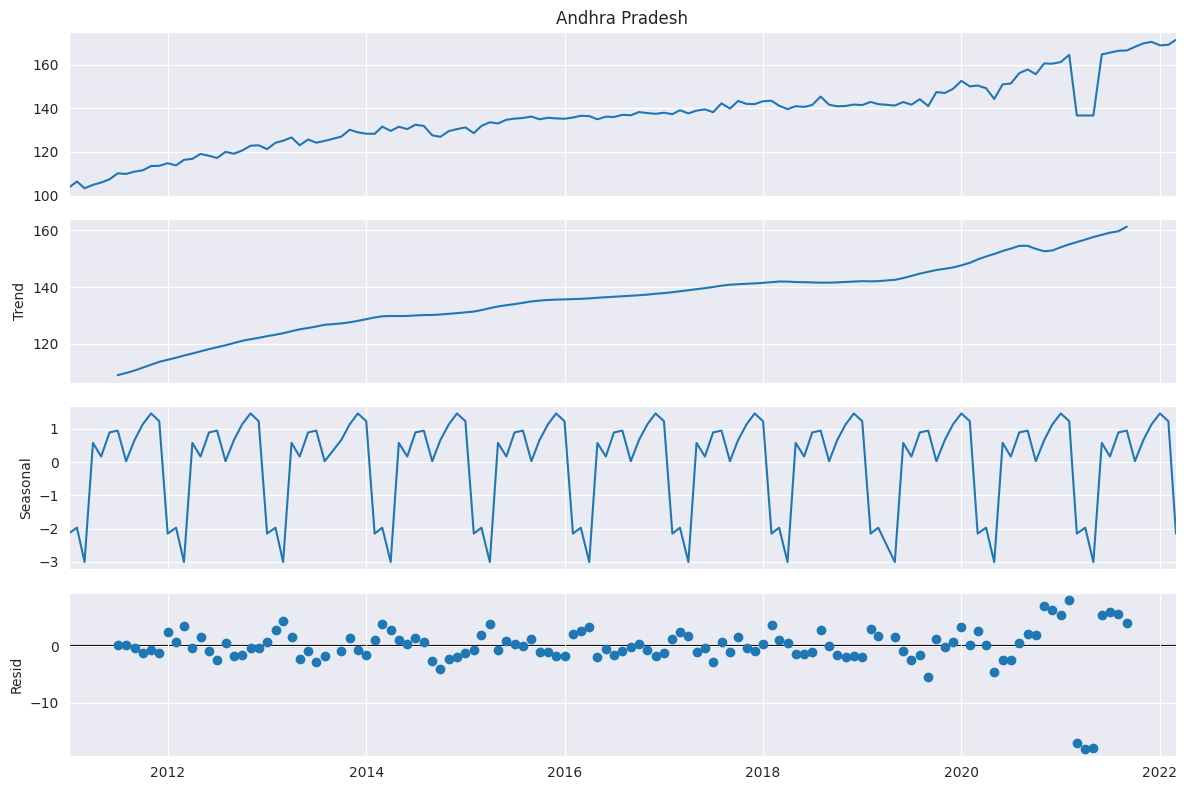

In [ ]:
from pylab import rcParams
from scipy.fftpack import fftfreq   # Fast Fourier Transform
import statsmodels.api as sm
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 12, 8

# Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(
    data1['Andhra Pradesh'],
    model='additive',
    period=12
)

fig = decomposition.plot()
plt.show()


####**The data contains Trend and level but not seasonality**

#**Split the data into train and test split**

In [ ]:
train_len =122
train = data1[0 : train_len]
test= data1[train_len :]

In [ ]:
train.head()

,Andhra Pradesh
Date,
2011-01-01,103.50
2011-02-01,106.50
2011-03-01,103.35
2011-04-01,104.95
2011-05-01,105.99


In [ ]:
test

,Andhra Pradesh
Date,
2021-05-01,136.70
2021-06-01,164.65
2021-07-01,165.45
2021-08-01,166.30
2021-09-01,166.45
2021-10-01,168.10
2021-11-01,169.70
2021-12-01,170.40
2022-01-01,168.80


In [ ]:
train.shape

(122, 1)

In [ ]:
test.shape

(11, 1)

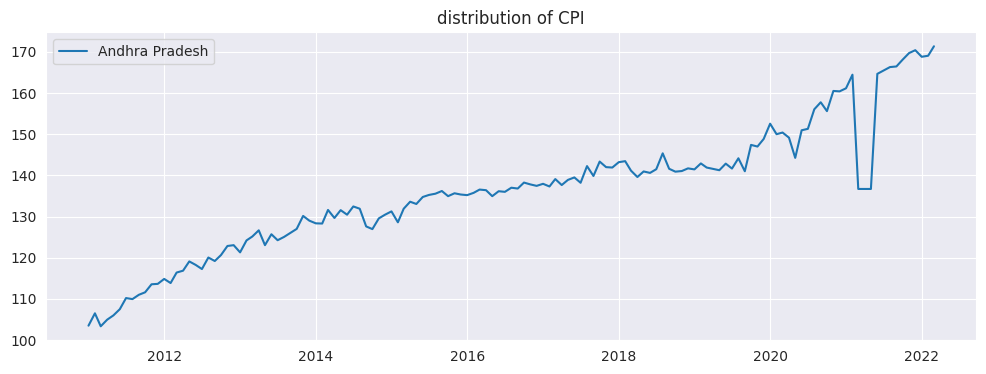

In [ ]:
plt.figure(figsize=(12,4))

# Replace 'Month' with 'Name' wherever applicable
plt.plot(data1['Andhra Pradesh'], label='Andhra Pradesh')

plt.legend(loc='best')
plt.title('distribution of CPI')
plt.show()

#**Checking the stationarity of the data**

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Andhra Pradesh'])
print(adf_test)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

(np.float64(0.2736964227492423), np.float64(0.9761049824113293), 9, 123, {'1%': np.float64(-3.4846672514209773), '5%': np.float64(-2.8853397507076006), '10%': np.float64(-2.5794629869786503)}, np.float64(655.2231216914082))
ADF Statistic: 0.273696
Critical Values @ 0.05: -2.89
p-value: 0.976105


###**Since p-value > 0.05, Our data is NOT STATIONARY**

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1['Andhra Pradesh'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.856375
Critical Values @ 0.05: 0.46
p-value: 0.010000


/tmp/ipython-input-2302474787.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(data1['Andhra Pradesh'])


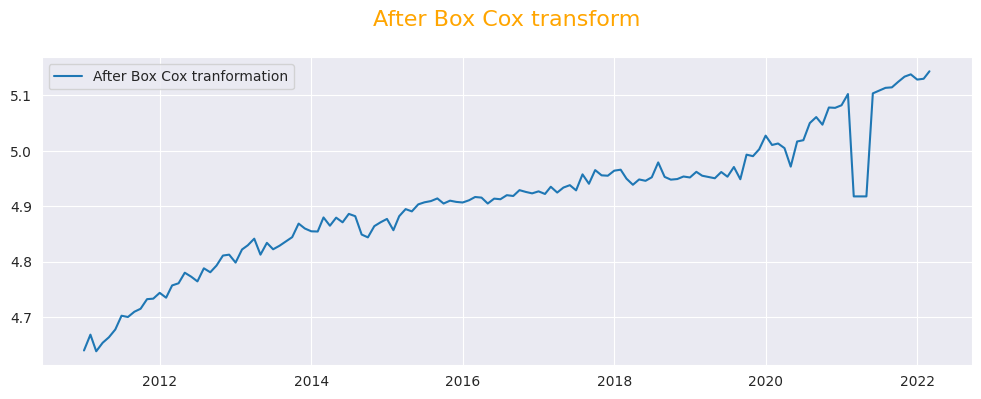

In [ ]:
from scipy.stats import boxcox

# Apply Box-Cox transformation

data_boxcox = pd.Series(boxcox(data1['Andhra Pradesh'], lmbda=0),index = data1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform\n', fontdict={'fontsize': 16, 'fontweight': 5, 'color': 'Orange'})
plt.show()

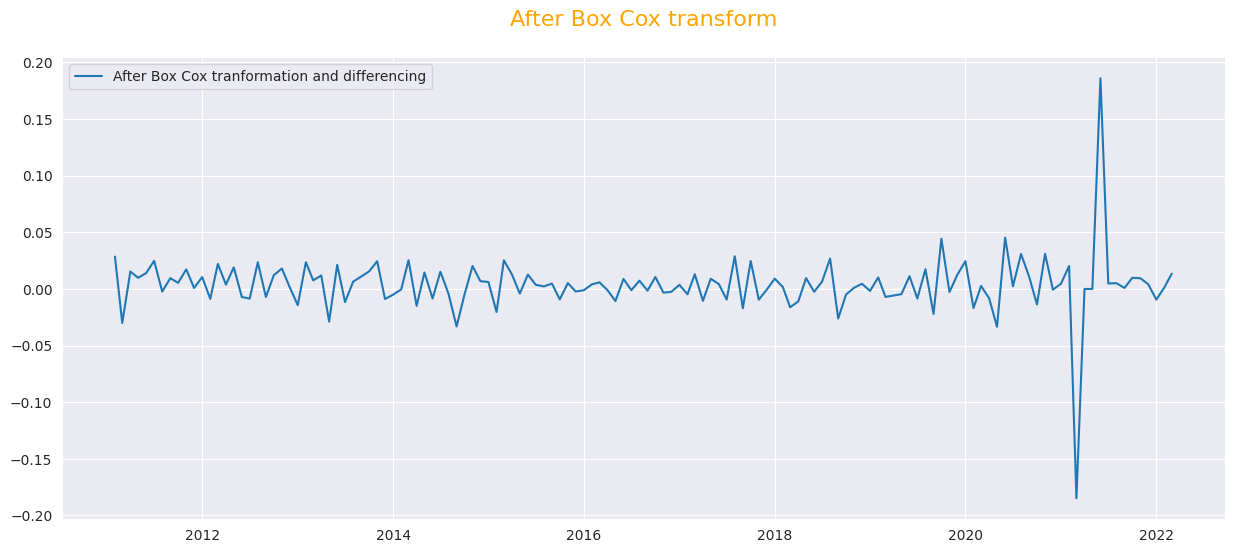

In [ ]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(15,6))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform\n', fontdict={'fontsize': 16, 'fontweight': 5, 'color': 'Orange'})
plt.show()

###**We can Clearly see that the data is now stationary, performing ADF test, we obtained a p-value of almost 0 and p value from KPSS test was 0.1000. Hence our data is now stationary**

In [ ]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

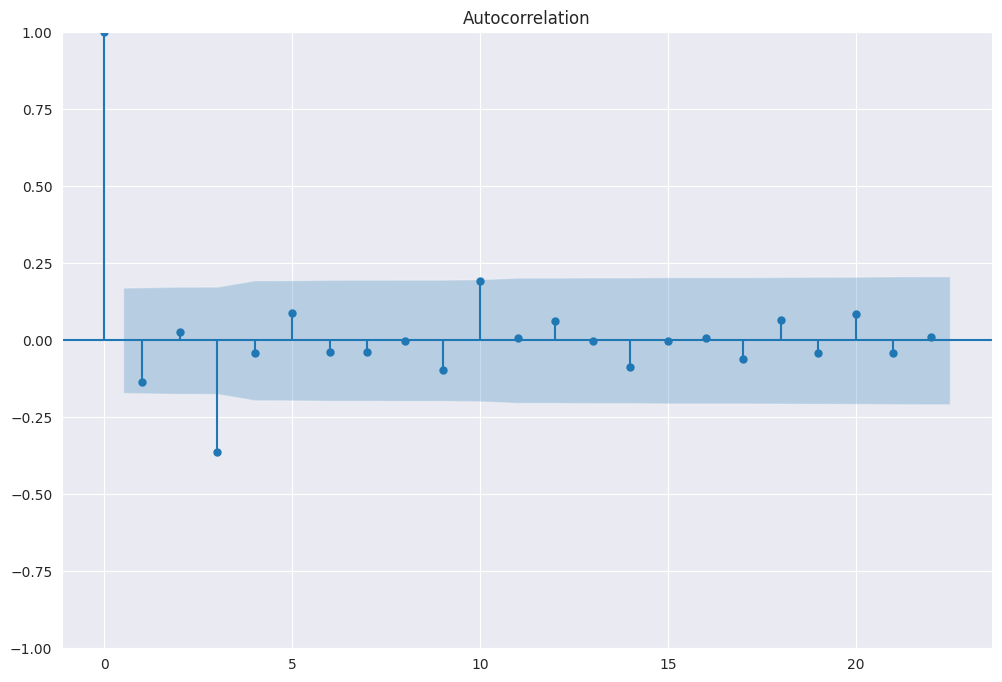

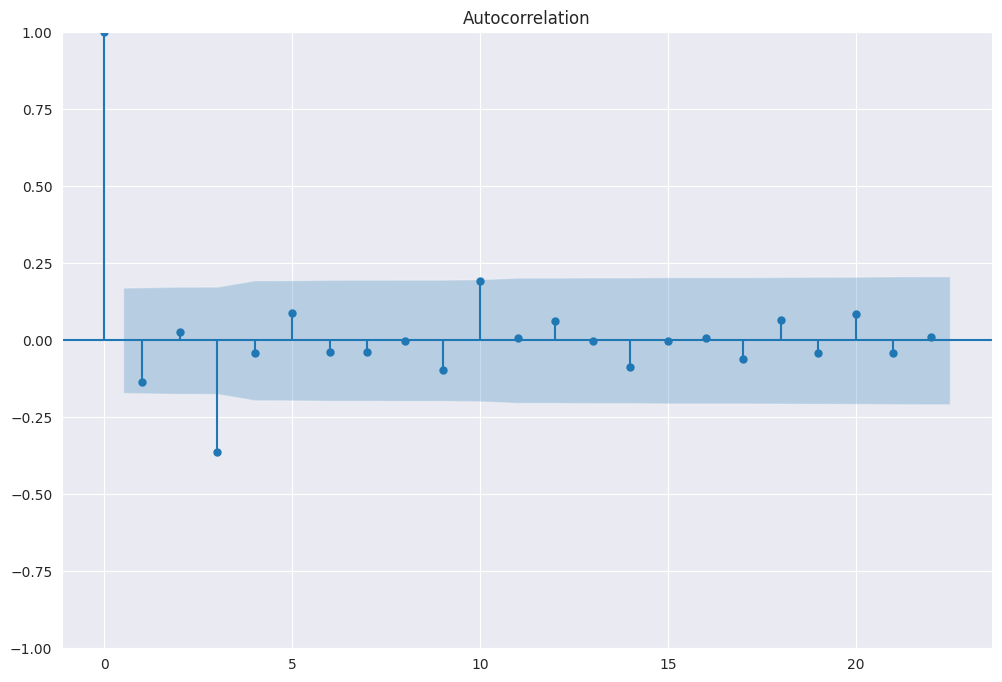

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
data_boxcox_diff.dropna(inplace = True)
plot_acf(data_boxcox_diff)

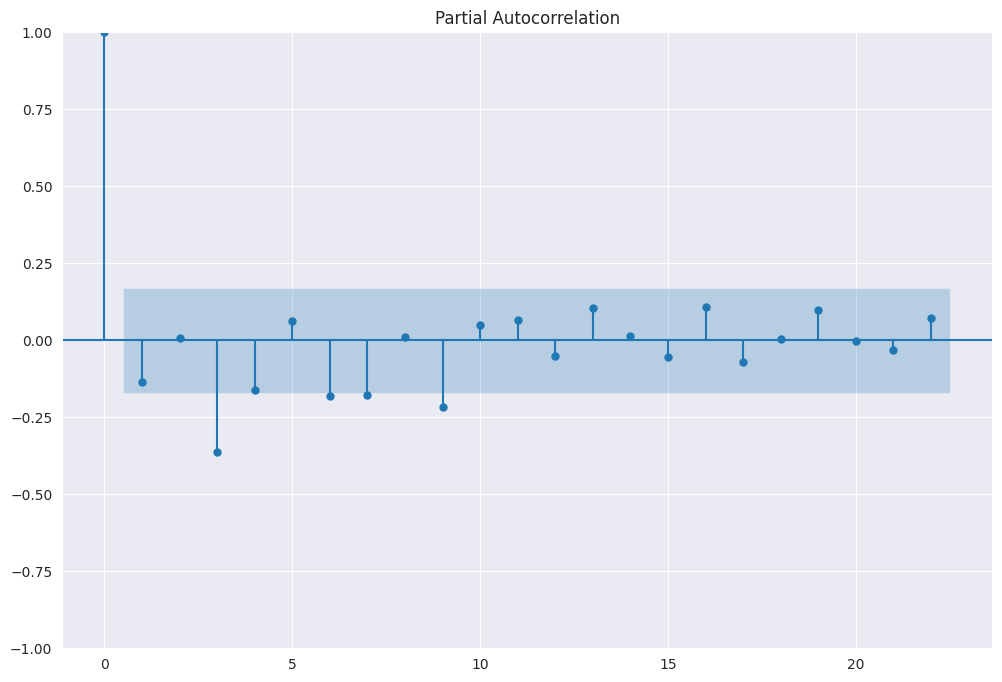

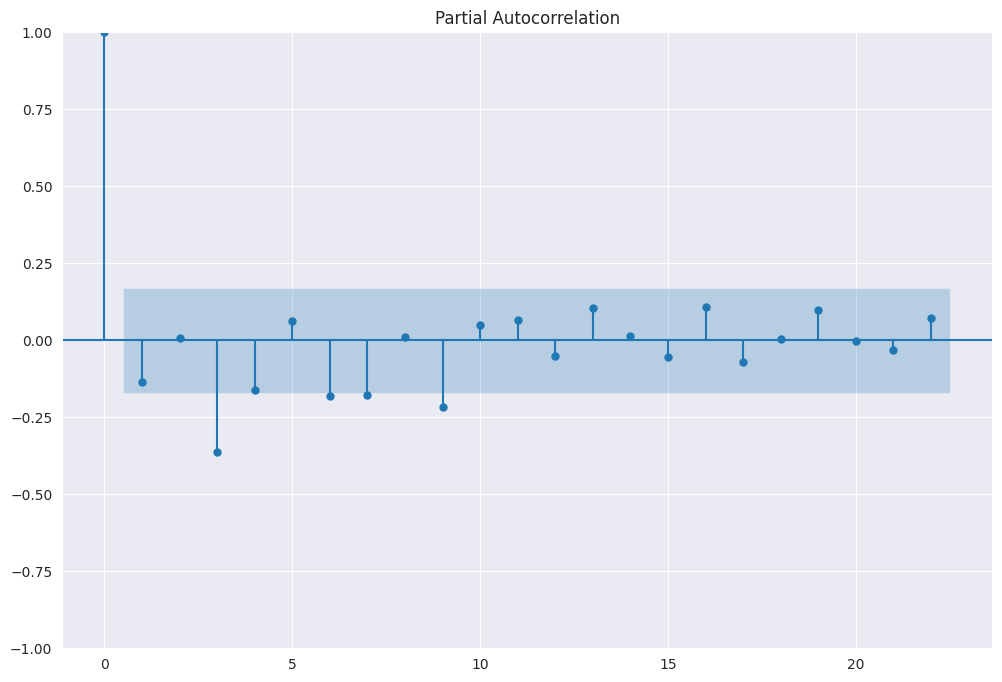

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data_boxcox_diff)

#**Fitting an ARIMA Model**
##Parameters 2,1,9

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_boxcox_diff, order=(2,1,9))
model_fit = model.fit()
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
 # Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

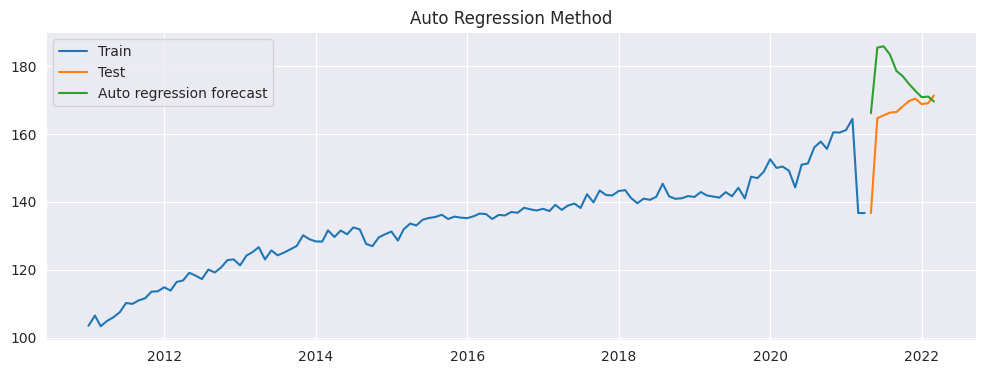

In [ ]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Andhra Pradesh'], label='Train')
plt.plot(test['Andhra Pradesh'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Andhra Pradesh'], y_hat_ar['ar_forecast'][test.index.min():]))
print('RMSE: %.3f' % rmse)

RMSE: 14.382


In [ ]:
mape = np.round(np.mean(np.abs(test['Andhra Pradesh'] - y_hat_ar['ar_forecast'][test.index.min():])/test['Andhra Pradesh']) * 100, 2)


In [ ]:
mape

np.float64(7.01)

In [ ]:
print(mape)

7.01


In [ ]:
future_predict = model_fit.predict(start =len(data1), end = (len(data1)) +24)
future_predict= future_predict.cumsum()
future_predict = future_predict.add(data_boxcox[0])
future_predict =np.exp(future_predict)

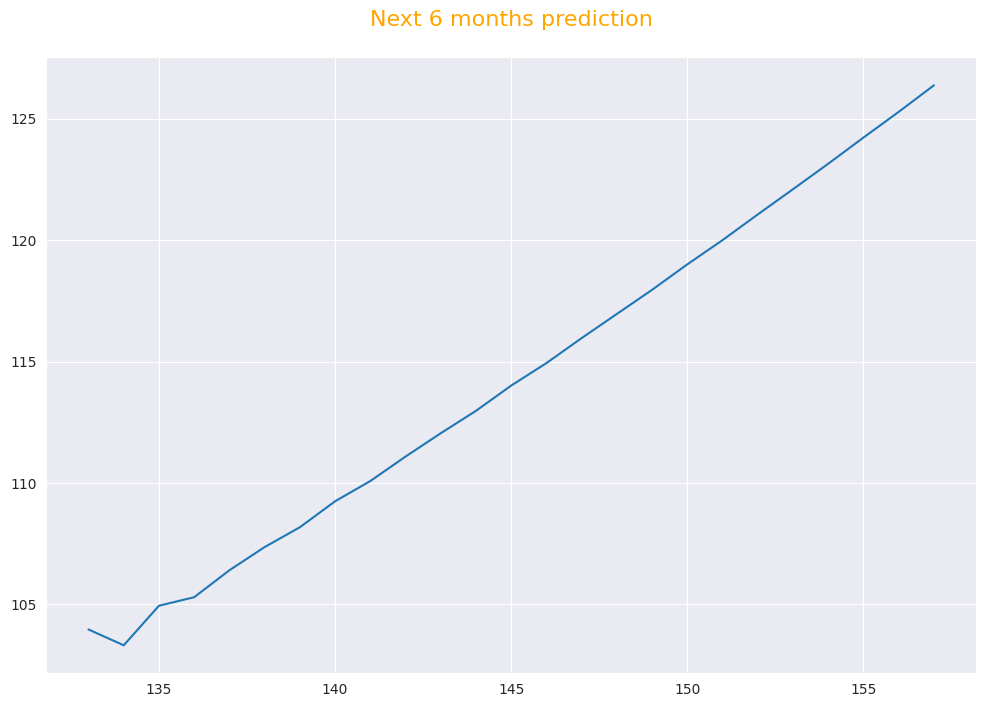

In [ ]:
future_predict.plot()
plt.title('Next 6 months prediction\n', fontdict={'fontsize': 16, 'fontweight': 5,'color': 'Orange'})
plt.show()